In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the csv files

In [2]:
crops = pd.read_csv('India Agriculture Crop Production.csv')
crops.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
rains = pd.read_csv('Sub_Division_IMD_2017.csv')
rains.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


#### Information of the datasets

In [4]:
crops.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676425 entries, 0 to 676424
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             676425 non-null  object 
 1   District          676425 non-null  object 
 2   Crop              675458 non-null  object 
 3   Year              676425 non-null  object 
 4   Season            676425 non-null  object 
 5   Area              675458 non-null  float64
 6   Area Units        675458 non-null  object 
 7   Production        665684 non-null  float64
 8   Production Units  675458 non-null  object 
 9   Yield             675458 non-null  float64
dtypes: float64(3), object(7)
memory usage: 51.6+ MB


In [5]:
rains.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

#### checking for null values in the datasets

In [6]:
crops.isnull().sum()

State                   0
District                0
Crop                  967
Year                    0
Season                  0
Area                  967
Area Units            967
Production          10741
Production Units      967
Yield                 967
dtype: int64

In [7]:
rains.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [8]:
rains.rename(columns = {'SUBDIVISION':'State'}, inplace = True)
rains.rename(columns = {'YEAR':'RainYear'}, inplace = True)
crops.rename(columns = {'Year':'CropYear'}, inplace = True)

In [29]:
crops.State.unique()
rains.State.unique()

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [10]:
# rains.replace('Andaman & Nicobar Islands', 'Andaman and Nicobar Islands')
# rains.replace('Jammu & Kashmir', 'Jammu and Kashmir')
# rains.replace('Andhra Pradesh', 'Coastal Andhra Pradesh')
# rains.replace('East Madhya Pradesh', 'Madhya Pradesh')
# rains.replace('West Madhya Pradesh', 'Madhya Pradesh')
# rains.replace('East Rajasthan', 'Rajasthan')
# rains.replace('West Rajasthan', 'Rajasthan')
# rains.replace('Coastal Karnataka', 'Karnataka')

In [11]:
crops_rains = pd.merge(crops, rains, on='State')
crops_rains

,State,District,Crop,CropYear,Season,Area,Area Units,Production,Production Units,Yield,...,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,...,629.7,333.9,NaN,NaN,NaN,NaN,117.9,811.8,NaN,NaN
1,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,...,628.4,411.5,199.3,63.5,0.0,NaN,185.9,NaN,2772.8,262.8
2,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,...,692.6,515.8,125.2,7.8,13.7,5486.3,21.4,1196.9,4121.3,146.7
3,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,...,286.7,628.7,948.3,40.7,8.6,4693.9,102.3,706.0,2888.0,997.6
4,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,...,896.5,376.7,103.3,0.0,0.0,4106.7,210.3,1143.9,2649.2,103.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21195256,Telangana,VIKARABAD,Wheat,2019-20,Rabi,46.0,Hectare,85.0,Tonnes,1.847826,...,230.6,161.4,205.9,16.4,2.7,1348.7,31.4,33.0,1059.2,225.0
21195257,Telangana,VIKARABAD,Wheat,2019-20,Rabi,46.0,Hectare,85.0,Tonnes,1.847826,...,205.2,146.8,29.6,10.8,0.7,746.4,3.1,141.9,560.2,41.0
21195258,Telangana,VIKARABAD,Wheat,2019-20,Rabi,46.0,Hectare,85.0,Tonnes,1.847826,...,160.5,158.3,15.6,0.3,1.7,857.3,17.5,132.0,690.1,17.6
21195259,Telangana,VIKARABAD,Wheat,2019-20,Rabi,46.0,Hectare,85.0,Tonnes,1.847826,...,133.7,336.3,70.4,0.5,0.4,1043.4,1.4,70.9,899.8,71.3


In [12]:
pd.set_option('display.max_columns', None)
crops_rains.head()

,State,District,Crop,CropYear,Season,Area,Area Units,Production,Production Units,Yield,RainYear,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,1916,48.1,69.8,71.1,316.1,424.6,1124.9,NaN,629.7,333.9,NaN,NaN,NaN,NaN,117.9,811.8,NaN,NaN
1,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,1917,21.4,164.5,NaN,269.6,107.9,823.8,909.1,628.4,411.5,199.3,63.5,0.0,NaN,185.9,NaN,2772.8,262.8
2,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,1918,10.4,11.0,191.2,144.6,861.1,1609.9,1303.0,692.6,515.8,125.2,7.8,13.7,5486.3,21.4,1196.9,4121.3,146.7
3,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,1919,34.5,67.8,28.5,256.9,420.6,973.6,999.0,286.7,628.7,948.3,40.7,8.6,4693.9,102.3,706.0,2888.0,997.6
4,Arunachal Pradesh,CHANGLANG,Dry chillies,2001-02,Whole Year,308.0,Hectare,410.0,Tonnes,1.331169,1920,14.0,196.3,605.6,364.7,173.6,840.6,535.4,896.5,376.7,103.3,0.0,0.0,4106.7,210.3,1143.9,2649.2,103.3


In [13]:
crops_rains.State.unique()

array(['Arunachal Pradesh', 'Bihar', 'Chhattisgarh', 'Himachal Pradesh',
       'Jharkhand', 'Kerala', 'Punjab', 'Tamil Nadu', 'Uttarakhand',
       'Telangana'], dtype=object)

In [14]:
crops_rains.isnull().sum()

State                    0
District                 0
Crop                 41535
CropYear                 0
Season                   0
Area                 41535
Area Units           41535
Production          383139
Production Units     41535
Yield                41535
RainYear                 0
JAN                   8690
FEB                   8690
MAR                  17380
APR                      0
MAY                      0
JUN                   8690
JUL                   8690
AUG                      0
SEP                      0
OCT                  17380
NOV                  17380
DEC                  17380
ANNUAL               52140
JF                    8690
MAM                  17380
JJAS                 17380
OND                  26070
dtype: int64

Tried to interpolate the values 

In [15]:
a=crops_rains.interpolate(method='pad')

In [16]:
a.isnull().sum()

State               0
District            0
Crop                0
CropYear            0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
RainYear            0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 1
AUG                 0
SEP                 0
OCT                 1
NOV                 1
DEC                 1
ANNUAL              2
JF                  0
MAM                 0
JJAS                1
OND                 1
dtype: int64

#### number of each different type of crops

In [17]:
Croptypes = a.Crop.value_counts()
Croptypes

Rice                     1508490
Maize                    1317312
Moong(Green Gram)         902916
Urad                      784530
Wheat                     735723
Sesamum                   714870
Arhar/Tur                 711000
Potato                    706680
Sugarcane                 671634
Rapeseed &Mustard         644724
Gram                      626418
Onion                     578916
Ragi                      557388
Horse-gram                509418
Groundnut                 494064
Dry chillies              481428
Small millets             475416
Peas & beans (Pulses)     471654
Turmeric                  471276
Masoor                    469422
Sunflower                 434826
Ginger                    398322
Jowar                     390078
Other Kharif pulses       387414
Barley                    370422
Banana                    368550
Sweet potato              341640
Coriander                 339066
Bajra                     322920
Linseed                   311922
Cotton(lin

#### Equating the years and predicting Rainfall from year

In [18]:
b=crops_rains.loc[(crops_rains['RainYear'] == 2017) & (crops_rains['CropYear'] == '2017-18')]   
b

,State,District,Crop,CropYear,Season,Area,Area Units,Production,Production Units,Yield,RainYear,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
209285,Arunachal Pradesh,DIBANG VALLEY,Arhar/Tur,2017-18,Kharif,48.0,Hectare,30.0,Tonnes,0.625000,2017,8.2,86.2,221.8,348.2,257.1,370.8,437.8,456.4,318.6,227.1,9.9,3.4,2745.3,94.4,827.0,1583.5,240.3
209582,Arunachal Pradesh,EAST KAMENG,Arhar/Tur,2017-18,Kharif,80.0,Hectare,76.0,Tonnes,0.950000,2017,8.2,86.2,221.8,348.2,257.1,370.8,437.8,456.4,318.6,227.1,9.9,3.4,2745.3,94.4,827.0,1583.5,240.3
209879,Arunachal Pradesh,EAST SIANG,Arhar/Tur,2017-18,Kharif,68.0,Hectare,60.0,Tonnes,0.882353,2017,8.2,86.2,221.8,348.2,257.1,370.8,437.8,456.4,318.6,227.1,9.9,3.4,2745.3,94.4,827.0,1583.5,240.3
210275,Arunachal Pradesh,LOHIT,Arhar/Tur,2017-18,Kharif,15.0,Hectare,14.0,Tonnes,0.933333,2017,8.2,86.2,221.8,348.2,257.1,370.8,437.8,456.4,318.6,227.1,9.9,3.4,2745.3,94.4,827.0,1583.5,240.3
210572,Arunachal Pradesh,LONGDING,Arhar/Tur,2017-18,Kharif,24.0,Hectare,8.0,Tonnes,0.333333,2017,8.2,86.2,221.8,348.2,257.1,370.8,437.8,456.4,318.6,227.1,9.9,3.4,2745.3,94.4,827.0,1583.5,240.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073931,Telangana,RANGAREDDI,Wheat,2017-18,Kharif,1.0,Hectare,1.0,Tonnes,1.000000,2017,0.0,0.0,8.7,3.2,22.4,202.2,143.2,204.2,115.3,114.6,1.9,0.0,815.7,0.0,34.3,664.9,116.4
21074048,Telangana,RANGAREDDI,Wheat,2017-18,Rabi,38.0,Hectare,53.0,Tonnes,1.394737,2017,0.0,0.0,8.7,3.2,22.4,202.2,143.2,204.2,115.3,114.6,1.9,0.0,815.7,0.0,34.3,664.9,116.4
21074399,Telangana,SANGAREDDY,Wheat,2017-18,Rabi,524.0,Hectare,543.0,Tonnes,1.036260,2017,0.0,0.0,8.7,3.2,22.4,202.2,143.2,204.2,115.3,114.6,1.9,0.0,815.7,0.0,34.3,664.9,116.4
21074750,Telangana,SIDDIPET,Wheat,2017-18,Rabi,7.0,Hectare,10.0,Tonnes,1.428571,2017,0.0,0.0,8.7,3.2,22.4,202.2,143.2,204.2,115.3,114.6,1.9,0.0,815.7,0.0,34.3,664.9,116.4


In [19]:
crops_rains.loc[crops_rains['Yield'].idxmax()]

State                 Tamil Nadu
District                   ERODE
Crop                     Coconut
CropYear                 2008-09
Season                Whole Year
Area                     10014.0
Area Units               Hectare
Production           331800000.0
Production Units            Nuts
Yield               33133.612942
RainYear                    1901
JAN                         24.5
FEB                         39.1
MAR                         21.7
APR                         36.0
MAY                         74.0
JUN                         41.8
JUL                         49.3
AUG                         67.9
SEP                        191.1
OCT                        122.3
NOV                        212.3
DEC                         80.4
ANNUAL                     960.3
JF                          63.6
MAM                        131.6
JJAS                       350.1
OND                        415.0
Name: 14821101, dtype: object

In [20]:
#crops_rains.loc[crops_rains['Yield'].idxmax()]
c=crops_rains.loc[((crops_rains['RainYear'] == 2000) & (crops_rains['CropYear'] == '2000-01')) & ((crops_rains['Yield'].idxmax()) | (crops_rains['ANNUAL'].idxmax()))]   
c

,State,District,Crop,CropYear,Season,Area,Area Units,Production,Production Units,Yield,RainYear,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
376974,Arunachal Pradesh,CHANGLANG,Dry chillies,2000-01,Whole Year,314.0,Hectare,415.0,Tonnes,1.321656,2000,54.1,47.1,139.9,293.8,267.2,459.8,395.4,387.4,407.4,81.3,53.9,9.6,2596.8,101.2,700.8,1650.0,144.8
377271,Arunachal Pradesh,DIBANG VALLEY,Dry chillies,2000-01,Whole Year,80.0,Hectare,320.0,Tonnes,4.000000,2000,54.1,47.1,139.9,293.8,267.2,459.8,395.4,387.4,407.4,81.3,53.9,9.6,2596.8,101.2,700.8,1650.0,144.8
377568,Arunachal Pradesh,EAST KAMENG,Dry chillies,2000-01,Whole Year,50.0,Hectare,76.0,Tonnes,1.520000,2000,54.1,47.1,139.9,293.8,267.2,459.8,395.4,387.4,407.4,81.3,53.9,9.6,2596.8,101.2,700.8,1650.0,144.8
377865,Arunachal Pradesh,EAST SIANG,Dry chillies,2000-01,Whole Year,140.0,Hectare,138.0,Tonnes,0.985714,2000,54.1,47.1,139.9,293.8,267.2,459.8,395.4,387.4,407.4,81.3,53.9,9.6,2596.8,101.2,700.8,1650.0,144.8
378162,Arunachal Pradesh,LOHIT,Dry chillies,2000-01,Whole Year,82.0,Hectare,155.0,Tonnes,1.890244,2000,54.1,47.1,139.9,293.8,267.2,459.8,395.4,387.4,407.4,81.3,53.9,9.6,2596.8,101.2,700.8,1650.0,144.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20098719,Uttarakhand,PITHORAGARH,Wheat,2000-01,Rabi,26883.0,Hectare,36139.0,Tonnes,1.344307,2000,29.9,69.4,37.9,18.1,83.3,313.9,420.1,536.1,195.3,1.1,7.0,0.7,1712.9,99.3,139.4,1465.4,8.8
20098836,Uttarakhand,RUDRA PRAYAG,Wheat,2000-01,Rabi,10916.0,Hectare,12959.0,Tonnes,1.187156,2000,29.9,69.4,37.9,18.1,83.3,313.9,420.1,536.1,195.3,1.1,7.0,0.7,1712.9,99.3,139.4,1465.4,8.8
20098953,Uttarakhand,TEHRI GARHWAL,Wheat,2000-01,Rabi,31952.0,Hectare,30370.0,Tonnes,0.950488,2000,29.9,69.4,37.9,18.1,83.3,313.9,420.1,536.1,195.3,1.1,7.0,0.7,1712.9,99.3,139.4,1465.4,8.8
20099070,Uttarakhand,UDAM SINGH NAGAR,Wheat,2000-01,Rabi,83673.0,Hectare,285412.0,Tonnes,3.411041,2000,29.9,69.4,37.9,18.1,83.3,313.9,420.1,536.1,195.3,1.1,7.0,0.7,1712.9,99.3,139.4,1465.4,8.8


<AxesSubplot:xlabel='State'>

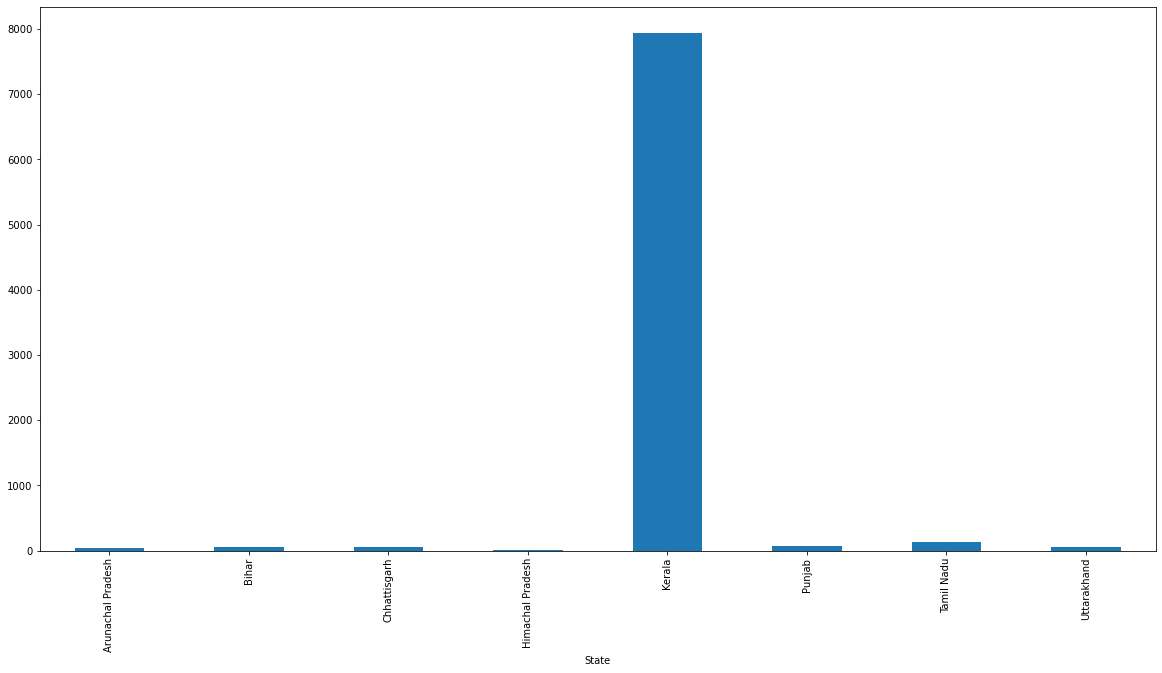

In [28]:
#plot=sns.displot(data=c, x="State", kind="hist", hue = 'Yield')
c.groupby(['State'], sort=True)['Yield'].max().plot(kind='bar', figsize=(20,10))

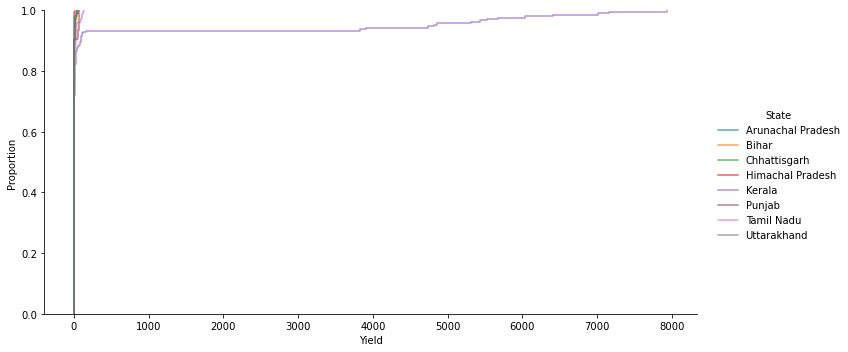

In [22]:
plot= sns.displot(data=c, kind="ecdf", x="Yield", hue = 'State', aspect=2, alpha=0.7)

### Which state grows more crops. state with the highest rainfall or lowest rainfall?

#### Plotting Continuous Variables (License Numbers)
* Used displot to see the distribution of LIC_NO column

In [23]:
plot = sns.displot(data = plants, x= 'LIC_NO', kind = 'hist', height=3 ,aspect=2)
plot.ax.grid(axis = 'x')
plot.ax.set_title('Distribution of LICENSE NUMBERS')



NameError: name 'plants' is not defined

#### Plotting Categorical Variables vs Categorical Variables (Counties vs license types)
* gaining insights between categorical vaiables is easier with displot.

In [ ]:
plot = sns.displot(plants, x="COUNTY", y="LICTYPE", cbar = True)
plot.ax.tick_params(labelrotation = 90)
plot.ax.set_title('Distribution between Counties and License types')



In [ ]:
plot=sns.displot(data=plants, x="LICTYPE", kind="hist", hue = 'COUNTY')
plot.ax.set_title('Count of plants using Counties and License types')

#### Categorical vs Numerical varibles (objectID vs license type)
* Here Empirical cumulative distribution function(ecdf) uses the 'OBJECTID' and 'LICTYPE' columns
* present the proportion of observations that falls under each unique value in a dataset without any adjustments.
* hue parameter maps the license type categories with different colors.


In [ ]:
plot= sns.displot(data=plants, kind="ecdf", x="OBJECTID", hue = 'LICTYPE', aspect=2, alpha=0.7)
plot.ax.grid()
plot.ax.set_title('Distribution between OBJECTID and License type')


#### plotting Continuous vs Continuous Variables (ObjectID vs License Number)

In [ ]:
plot = sns.displot(data = plants, x="OBJECTID", y="LIC_NO", height= 8, aspect= 1.5)
plot.ax.set_title('Distribution between OBJECTID and License number')


# Conclusion

* While cleaning the dataset we got to learn the different kinds of errors that are possible while entering the data. 
* We tried to correct those errors and clean the data by performing the sanity checks. 
* Throughout we maintained our purpose of cleaning the data and tried not to change its roots. 
* We learned about different ways of distributing the data through plots.
* We tried to analyze the data by applying the EDA techniques.
* A plot without any insight is meaningless. Also, we can get more accurate insight from the plot if our data is clean.